In [58]:
import pygad
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import time
from functools import partial

In [26]:
dataset_path = 'NVDA.csv'
data = pd.read_csv(dataset_path)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA,EMA,UpperBB,LowerBB,Daily_Return,Cumulative_Return,Window_Return,Volatility
0,2010-01-04,0.424410,0.426933,0.415239,0.423952,800204000,0.0,0.0,0.386383,0.388421,0.448434,0.324333,-0.010171,1.324498,0.336949,0.105565
1,2010-01-05,0.422347,0.434728,0.422347,0.430143,728648000,0.0,0.0,0.391542,0.392395,0.449835,0.333250,0.014602,1.343839,0.315568,0.102702
2,2010-01-06,0.429913,0.433811,0.425786,0.432894,649168000,0.0,0.0,0.394741,0.396252,0.454801,0.334681,0.006397,1.352435,0.173400,0.104711
3,2010-01-07,0.430601,0.432435,0.421200,0.424410,547792000,0.0,0.0,0.398409,0.398934,0.456148,0.340670,-0.019598,1.325931,0.209014,0.100835
4,2010-01-08,0.420971,0.428308,0.418449,0.425328,478168000,0.0,0.0,0.401688,0.401447,0.457603,0.345773,0.002161,1.328796,0.182282,0.101441


In [106]:
daily_returns = np.array(data['Daily_Return'].head(20))
volatility = np.array(data['Volatility'].head(20))

In [109]:
def normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)
daily_returns = normalize(daily_returns)
volatility = normalize(volatility)

In [111]:
def fitness_func(ga_instance, solution, sol_idx):
    global daily_returns, volatility
    
    weights = np.array(solution, dtype=int)
    
    # Garantir que a soma dos pesos seja positiva
    if np.sum(weights) <= 0:
        return -np.inf
    
    weighted_returns = np.dot(daily_returns, weights)
    
    weighted_volatility = np.dot(volatility, weights)
    
    risk_adjusted_return = weighted_returns - weighted_volatility
    
    return risk_adjusted_return


In [112]:
# Inicialização com valores positivos dentro de um intervalo razoável
ga_instance = pygad.GA(
    num_generations=100,
    num_parents_mating=5,
    fitness_func=fitness_func,
    sol_per_pop=10,
    num_genes=20, 
    gene_type=int,
    init_range_low=1, 
    init_range_high=10,
    parent_selection_type="sss",
    keep_parents=2,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=10
)

In [113]:
def on_generation(ga_instance):
    print(f"Generation {ga_instance.generations_completed} complete")
    time.sleep(1)  # Atraso de 1 segundo

In [114]:
ga_instance.run()

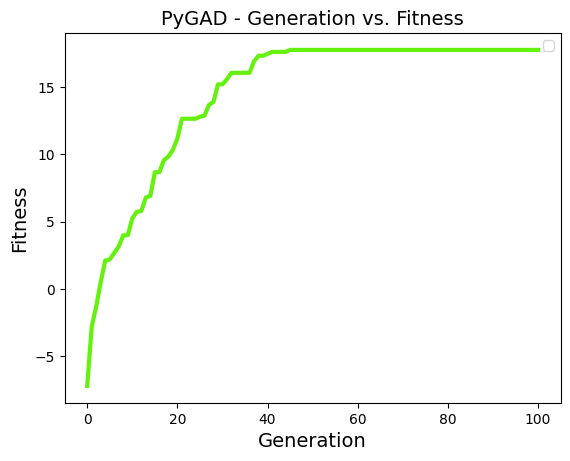

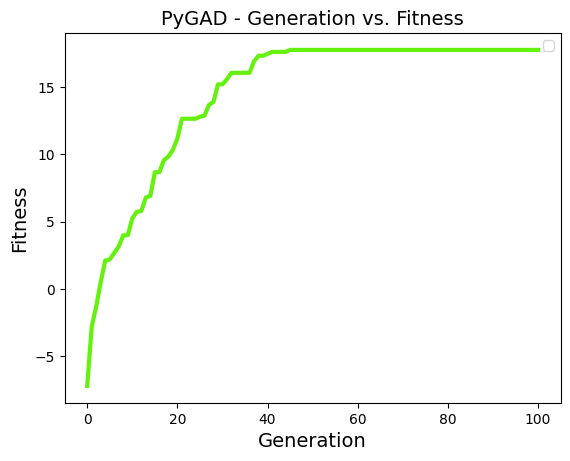

In [115]:
ga_instance.plot_fitness()

In [116]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Parameters of the best solution : [8 8 7 5 6 7 2 8 8 0 8 0 0 0 0 0 0 0 0 5]
Fitness value of the best solution = 17.760554144080402
Index of the best solution : 0


Referências:  
https://www.digitalocean.com/community/tutorials/genetic-algorithm-applications-using-pygad